In [1]:
import pandas as pd

df = pd.read_csv("../../data/yob2000.txt", index_col=0, sep=",", names=["Name", "Sex", "Rank"])
df.head(df.shape[0])

,Sex,Rank
Name,,
Emily,F,25957
Hannah,F,23085
Madison,F,19968
Ashley,F,17997
Sarah,F,17708
...,...,...
Zeph,M,5
Zeven,M,5
Ziggy,M,5


In [2]:
# Task 1
total_births = df["Rank"].sum()
df["Percentage"] = (df["Rank"] / total_births) * 100
print(df["Percentage"].sum())
df.head(df.shape[0])

99.99999999999997


,Sex,Rank,Percentage
Name,,,
Emily,F,25957,0.686806
Hannah,F,23085,0.610814
Madison,F,19968,0.528341
Ashley,F,17997,0.476189
Sarah,F,17708,0.468542
...,...,...,...
Zeph,M,5,0.000132
Zeven,M,5,0.000132
Ziggy,M,5,0.000132


In [3]:
# Task 2
import glob
import re

all_years = glob.glob("../../data/*.txt")
li = []
for year in all_years:
    frame = pd.read_csv(year, index_col=0, sep=",", names=["Name", "Sex", "Rank"])
    frame["Year"] = re.match(r'.*([1-3][0-9]{3})', year)[1]
    li.append(frame)
df = pd.concat(li)
df.head(df.shape[0])

,Sex,Rank,Year
Name,,,
Emily,F,25957,2000
Hannah,F,23085,2000
Madison,F,19968,2000
Ashley,F,17997,2000
Sarah,F,17708,2000
...,...,...,...
Zyheem,M,5,2019
Zykel,M,5,2019
Zyking,M,5,2019


<Axes: xlabel='Year'>

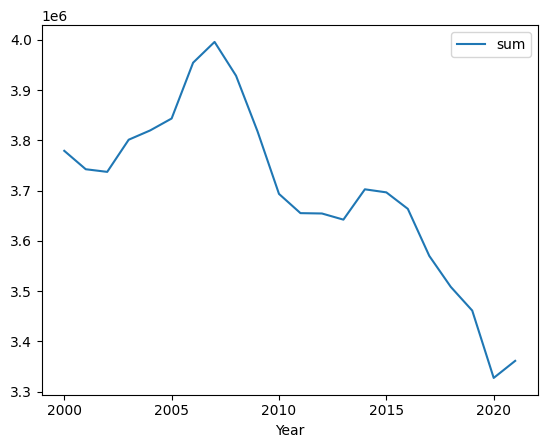

In [4]:
# Task 3
df["Year"].astype(int)
df.groupby(["Year"])["Rank"].agg(["sum"]).plot()

In [31]:
def name_trend(name):
    try: 
        pot = df.loc[name]
    except KeyError:
        print("Name not found :(")
    else:
        return pot.groupby(["Year"])["Rank"].agg(["sum"])

<Axes: xlabel='Year'>

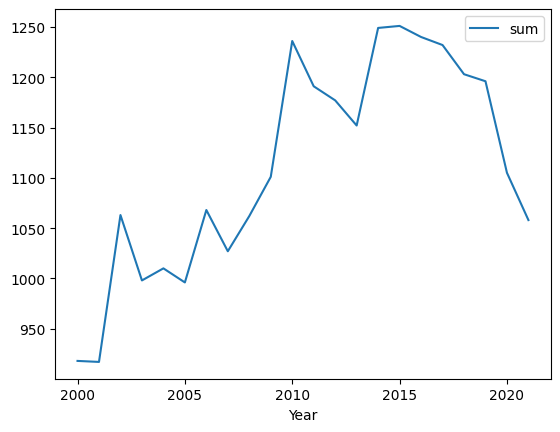

In [71]:
# Task 4 (how to add zeros?)

name_trend("Aaryan").plot()

Text(0, 0.5, 'Births')

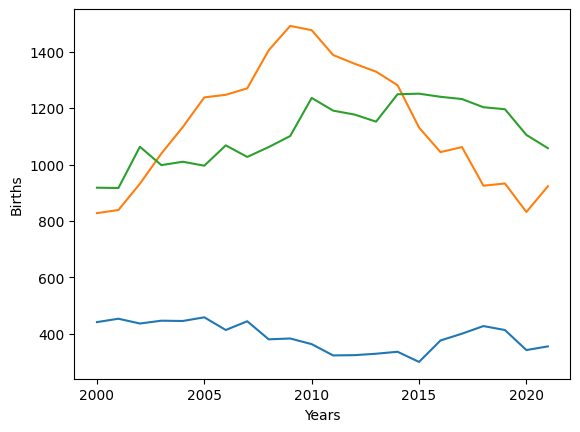

In [54]:
# Task 5
import matplotlib.pyplot as plt
names = ["Harry", "Tyson", "Ali"]
li = []
for name in names:
    pot = name_trend(name)
    pot["Name"] = name
    pot["sum"].plot(label=name)

plt.xlabel("Years")
plt.ylabel("Births")


<Axes: xlabel='Year'>

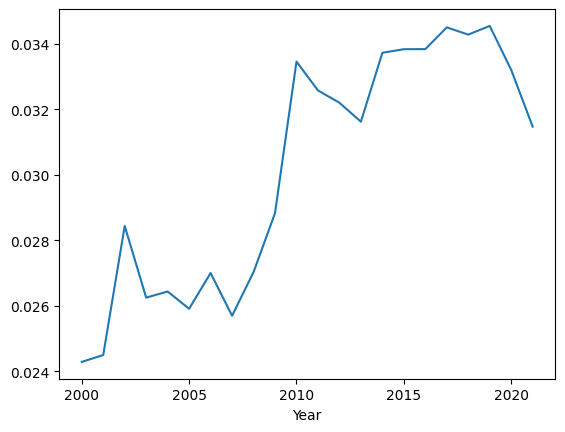

In [72]:
# Task 6

aaryans = name_trend("Ali")
aaryans.head(aaryans.shape[0])
sum = df.groupby(["Year"])["Rank"].agg(["sum"])
merged = pd.merge(aaryans, sum, on="Year")
merged.columns = ["Aaryans", "Total"]
merged["Percentage"] = (merged["Aaryans"] / merged["Total"]) * 100
merged["Percentage"].plot()